<a href="https://colab.research.google.com/github/kaliappan01/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
model = KMeans(n_clusters = 3)

In [6]:
model.fit(X)
labels = model.labels_

In [7]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [8]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 0.92, 'k-means clustering')

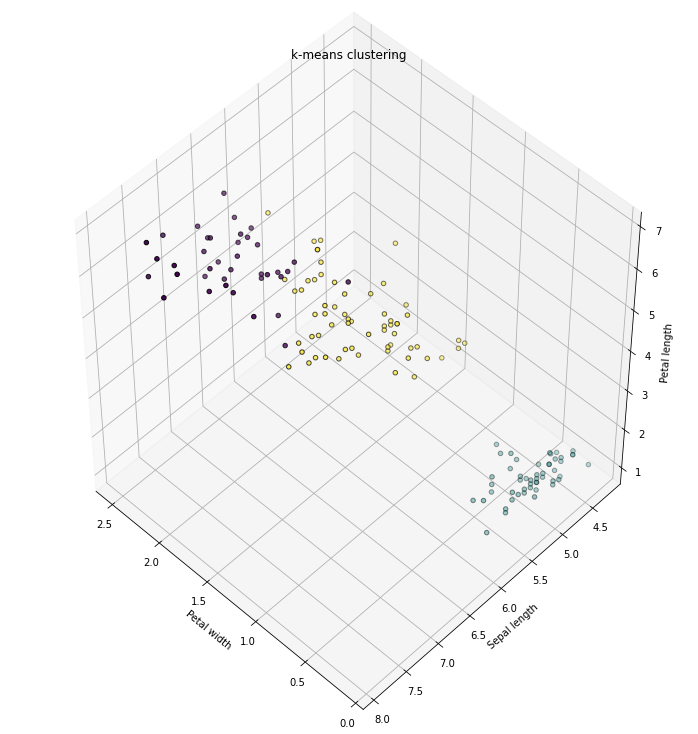

In [9]:
fig = plt.figure(1, figsize = (10,10))
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)

ax.scatter(X[:, 3], X[:, 0], X[:, 2], 
           c = labels.astype(np.float), edgecolor = 'k')
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('k-means clustering')

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca_object = PCA(n_components=3)
pca_object.fit(X)
X_pca = pca_object.transform(X)

In [12]:
pca_object.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,cross_val_score
RF_model = RandomForestClassifier(max_depth=2)

In [14]:
my_pipeline = make_pipeline(RF_model)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [15]:
RF_model.fit(X_train,y_train)
pred_rf = RF_model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, pred_rf)
print(cm)
print('Accuracy',accuracy_score(y_test, pred_rf))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy 0.9666666666666667


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
pca_2 = PCA()
X_train_pca = pca_2.fit_transform(X_train_scaled)
X_test_pca = pca_2.transform(X_test_scaled)

In [19]:
pca_2.explained_variance_ratio_

array([0.72229951, 0.2397406 , 0.03335483, 0.00460506])

In [20]:
RF_model2 = RandomForestClassifier()
RF_model2.fit(X_train_pca,y_train)
pred_pca = RF_model2.predict(X_test_pca)

In [21]:
cm = confusion_matrix(y_test, pred_pca)
print(cm)
print('Accuracy',accuracy_score(y_test, pred_rf))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy 0.9666666666666667
